# 공공데이터 코로나 관련 뉴스 분석
- 국가중점데이터인 상권 정보를 살펴봅니다.

## 필요한 라이브러리 불러오기
- Pandas : Python Data Analysis Library
- Numpy : numpy
- seaborn : data visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 폰트 설정

In [3]:
import matplotlib.pyplot as plt
# Mac 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [4]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

## 데이터 로드하기
- 판다스에서 데이터를 로드할 때는 `read_csv()`를 사용합니다.
- 데이터를 로드해서 df에 담습니다.
- 그리고 `shape`를 통핵서 데이터의 개수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [5]:
# read_csv로 불러온 파일을 df에 담기
df = pd.read_csv('../data/한국언론진흥재단_뉴스빅데이터_메타데이터_코로나_20200831.csv', encoding='CP949')
df.shape

(108947, 18)

## 데이터 미리보기
- head, tail을 통해 데이터를 미리 볼 수 있다.

In [6]:
df.head()

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,개체명(인물),개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
0,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,경기일보,임진흥 기자,"의왕시, 청소년 랜선 트롯 가요제 개최",문화>전시_공연,NaN,NaN,NaN,NaN,NaN,NaN,의왕시 의왕학생축제,진로 의왕학생동아리연합회 의왕시장 의왕시,"의왕시,청소년,랜선,트롯,가요,개최,의왕시,코로나,장기,진로체험,문화,활동,청소년들...","의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯...",의왕시는 코로나 19 장기화로 진로체험 및 문화 활동이 어려운 청소년들을 위해 진로...,www.kyeonggi.com/news/articleView.html idxno=2...
1,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,경기일보,이광희 기자,이재명이 조폭 ' 악의적 허위사실 유포 90건 경찰 '고발',사회>미디어,지역>경기,지역>충남,NaN,NaN,NaN,백 백종덕 최정민 이재명,경기도지사 왜곡,서성민 변호사 가짜뉴스 일베 광주경찰서 분당경찰서,"이재명이,조폭,악의,허위,사실,유포,경찰,고발,대책단,코로나19,가짜,백종덕,최정민...","이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,온라인,살해설,조...",코로나19 가짜뉴스 대책단(백종덕ㆍ최정민ㆍ서성민 변호사 공동단장)이 지난 29일 이...,www.kyeonggi.com/news/articleView.html idxno=2...
2,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,한국경제,한경닷컴,"모츠(MOTZ), 비대면 라이브 이벤트 솔루션 출시",IT_과학>콘텐츠,IT_과학>인터넷_SNS,IT_과학>모바일,NaN,NaN,NaN,NaN,페기구 한국형 뉴딜정책 내한공연 한국 동계 평창,정부 세미나 프라이빗 한경닷컴 ㈜캐롯닷밀 비대면 캐롯닷밀 한국 페스티벌,"모츠,MOTZ,출시,라이브,이벤트,솔루션,언택트,시대,마케팅,업계,변화,바람,오프라...","오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아","지금까지와는 전혀 다른 언택트 시대가 다가오면서, 마케팅 업계에도 변화의 바람이 불...",https://www.hankyung.com/economy/article/20200...
3,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,YTN,양시창,소리 못 질러도 괜찮아...'직관' 갈증 해소한 축구팬들,스포츠>축구,스포츠>농구_배구,스포츠>월드컵,NaN,NaN,NaN,최용수,경기 광주도 성남 성남시 전북 전북도 포항,서울,"소리,직관,갈증,해소,축구팬들,앵커,프로야구,프로축구,코로나,사태,관중,입장,허용,...","팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2칸,엄원,모라이스...",[앵커] ..프로야구에 이어 프로축구도 코로나 19 사태 뒤 처음으로 관중 입장이 ...,https://www.ytn.co.kr/_ln/0107_202008012223393076
4,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,YTN,박철원,"미, 코로나19 백신 대량 입도선매...EU·日도 백신 확보전 동참",국제>미국_북미,IT_과학>IT_과학일반,NaN,사회>사회갈등>시위,NaN,NaN,앤서니 파우치,미 미국 유럽 일본 프랑스,EU 미국 유럽연합 정부 제약사 집행위원회 행정부,"코로나19,백신,대량,입도선매,EU·,동참,백신,확보전,앵커,세계적,재확산,코로나1...","미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입도선매,사람들,임...",[앵커] ..전세계적으로 재확산 중인 코로나19가 진정될 조짐을 안 보이는 가운데 ...,https://www.ytn.co.kr/_ln/0104_202008010720568851


In [26]:
df.tail()

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,개체명(인물),개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
108942,http://www.bigkinds.or.kr/news/newsDetailView....,20200831.0,매일경제,고득관,"코스피, 외국인 1조원 매도에 급락 전환…2330선 후퇴",경제>증권_증시,경제>외환,경제>부동산,범죄>기업범죄>거래제한,NaN,NaN,NaN,NaN,배드민턴장 수도권 유가증권 정부 중앙방역대책본부 커피전문점,"코스피,외국인,매도,급락,전환,2330선,후퇴,출발,급등,코스피,외국인,매도세,급락...","코로나19,외국인,코스피,2330선,1조,확진자,종목들,감염증,하이닉스,삼성,셀트리...",1%대 급등 출발했던 코스피가 외국인의 강한 매도세에 급락세로 돌아섰다... 237...,http://news.mk.co.kr/newsRead.php no=895468&ye...
108943,http://www.bigkinds.or.kr/news/newsDetailView....,20200831.0,매일경제,김경택,"다이노나, `DNP002` 영장류 실험서 호중구 제거 효과 입증",사회>사회일반,IT_과학>과학,NaN,NaN,NaN,NaN,NaN,NaN,금호에이치티 식품의약품안전처,"다이노나,DNP002,영장,실험,호중구,제거,효과,입증,금호에이치티,합병,추진,다이...","다이노나,호중구,ards,코로나19,dnp002,기대감,만큼,영장류,고형암,치료제,...",최근 금호에이치티와 합병 추진을 발표한 다이노나는 자체 개발 항체 신약 ..'DNP...,http://news.mk.co.kr/newsRead.php no=895441&ye...
108944,http://www.bigkinds.or.kr/news/newsDetailView....,20200831.0,매일경제,이남경,"폴킴, ‘집돌이 챌린지’ 진행…사회적 거리 두기 딱 맞는 독려 이벤트",문화>전시_공연,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MBN스타 국립 뉴런뮤직 서울의료원,"폴킴,집돌,챌린지,진행,사회적,거리,독려,이벤트,싱어송라이터,폴킴,집돌,챌린지,진행...","폴킴,코로나19,서울의료원,대중문화부,집돌이,언택트,집돌,대중들,시민들,국민들,뉴런...",싱어송라이터 폴킴이 ..‘집돌이 챌린지’를 진행한다. .. ..소속사 뉴런뮤직은 최...,http://star.mbn.co.kr/view.php year=2020&no=89...
108945,http://www.bigkinds.or.kr/news/newsDetailView....,20200831.0,매일경제,이다겸,"폴킴, ‘집돌이 챌린지’ 개최...코로나19 사회적 거리두기 독려",문화>전시_공연,지역>경북,지역>대전,NaN,NaN,NaN,NaN,수도권,국립 뉴런뮤직 서울의료원,"폴킴,집돌,챌린지,개최,코로나19,사회,거리,독려,거리,수도,사회,2.5단계,격상,...","폴킴,코로나19,서울의료원,집돌이,언택트,집돌,대중들,시민들,뉴런뮤직,국민들,겨냥곡...",[매일경제 스타투데이 이다겸 기자] ..수도권 사회적 거리두기가 2.5단계로 격상된...,http://star.mk.co.kr/new/view.php mc=ST&year=2...
108946,http://www.bigkinds.or.kr/news/newsDetailView....,20200831.0,한국경제,강동균(kdg@hankyung.com);,中 큰손들 홍콩 부동산 '쇼핑'…한 달간 6000억원어치 쓸어담아,국제>중국,경제>부동산,경제>유통,사회>사회갈등>시위,NaN,NaN,대니얼 웡,40억홍콩달러 경기 미들랜드 중국 최고경영자 홍콩,CBRE IC&I 로이터통신,"쇼핑,큰손,홍콩,부동산,원어치,홍콩,국가,보안법,홍콩보안법,시행,외국인들,시장,홍콩...","홍콩,부동산,외국인,투자자,중국,홍콩보안법,대니얼,중국인,보안법,코로나바이러스,송환...",홍콩 국가보안법(홍콩보안법) 시행 이후 외국인들이 빠져나가고 있는 홍콩 부동산 시장...,https://www.hankyung.com/international/article...


## 데이터 요약하기
### 요약 정보

In [7]:
# info로 데이터의 요약을 볼 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108947 entries, 0 to 108946
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   주소          108947 non-null  object 
 1   일자          106090 non-null  float64
 2   언론사         106091 non-null  object 
 3   기고자         102059 non-null  object 
 4   제목          106091 non-null  object 
 5   통합 분류1      102346 non-null  object 
 6   통합 분류2      81882 non-null   object 
 7   통합 분류3      65321 non-null   object 
 8   사건/사고 분류1   11018 non-null   object 
 9   사건/사고 분류2   2112 non-null    object 
 10  사건/사고 분류3   600 non-null     object 
 11  개체명(인물)     63519 non-null   object 
 12  개체명(지역)     95037 non-null   object 
 13  개체명(기업/기관)  101898 non-null  object 
 14  키워드         106089 non-null  object 
 15  특성추출        106089 non-null  object 
 16  본문          106089 non-null  object 
 17  원본주소        104963 non-null  object 
dtypes: float64(1), object(17)
memory usage: 15.0

### Column 명 보기

In [8]:
# 컬럼명만 출력해보기.
df.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

### 데이터 타입

In [9]:
# 데이터 타입만 출력하기.
df.dtypes

주소             object
일자            float64
언론사            object
기고자            object
제목             object
통합 분류1         object
통합 분류2         object
통합 분류3         object
사건/사고 분류1      object
사건/사고 분류2      object
사건/사고 분류3      object
개체명(인물)        object
개체명(지역)        object
개체명(기업/기관)     object
키워드            object
특성추출           object
본문             object
원본주소           object
dtype: object

## 결측치


In [10]:
null_count = df.isnull().sum()
null_count

주소                 0
일자              2857
언론사             2856
기고자             6888
제목              2856
통합 분류1          6601
통합 분류2         27065
통합 분류3         43626
사건/사고 분류1      97929
사건/사고 분류2     106835
사건/사고 분류3     108347
개체명(인물)        45428
개체명(지역)        13910
개체명(기업/기관)      7049
키워드             2858
특성추출            2858
본문              2858
원본주소            3984
dtype: int64

### 시각화하기

<AxesSubplot:>

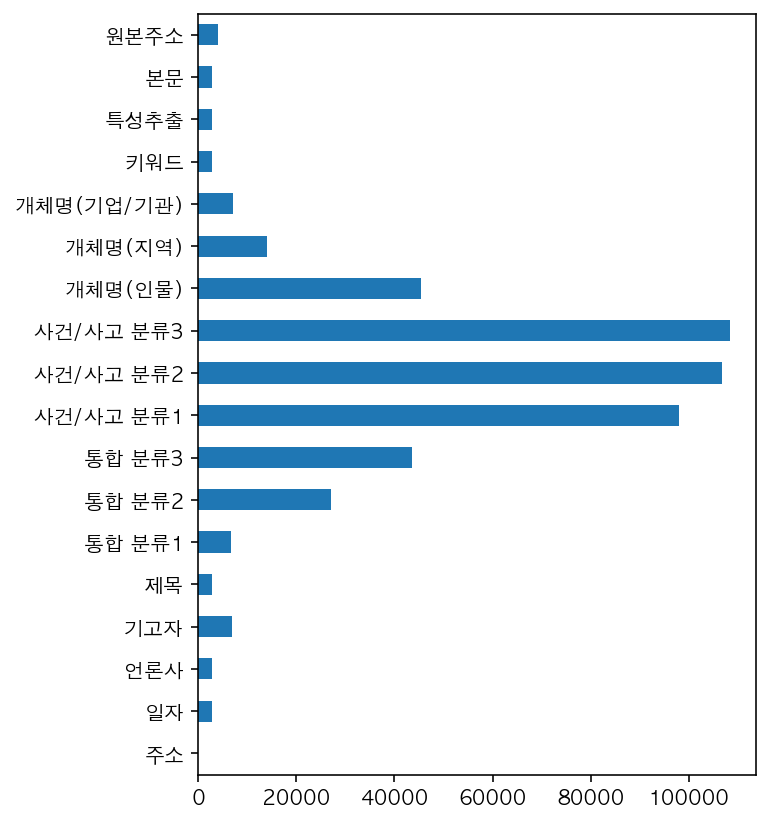

In [11]:
# 위에서 구한 결측치를 .plot.bar 을 통해 막대그래프로 표현합니다.
null_count.plot.barh(figsize=(5,7))

In [12]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터 프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head로 미리보기를 합니다.

df_null_count = null_count.reset_index()
df_null_count

,index,0
0,주소,0
1,일자,2857
2,언론사,2856
3,기고자,6888
4,제목,2856
5,통합 분류1,6601
6,통합 분류2,27065
7,통합 분류3,43626
8,사건/사고 분류1,97929
9,사건/사고 분류2,106835


## 컬럼명 변경하기

In [13]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수" 로 변경해 줍니다.
df_null_count.columns = ['컬럼명', '결측치수']
df_null_count

,컬럼명,결측치수
0,주소,0
1,일자,2857
2,언론사,2856
3,기고자,6888
4,제목,2856
5,통합 분류1,6601
6,통합 분류2,27065
7,통합 분류3,43626
8,사건/사고 분류1,97929
9,사건/사고 분류2,106835


## 정렬하기

In [14]:
# df_null_count 데이터 프레임에 있는 결측치수 컬럼을 sort_values를 통해 정렬핵서
# 결측치가 많은 순 상위 3개만 출력합니다.

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(5)
df_null_count_top

,컬럼명,결측치수
10,사건/사고 분류3,108347
9,사건/사고 분류2,106835
8,사건/사고 분류1,97929
11,개체명(인물),45428
7,통합 분류3,43626


## 특정 컬럼만 불러오기

In [15]:
# "사건/사고 분류3" 컬럼을 불러옵니다.
# NaN == Not a Number 의 약자로 결측치를 의미한다.

df["사건/사고 분류3"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: 사건/사고 분류3, dtype: object

In [16]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.

drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['사건/사고 분류3', '사건/사고 분류2', '사건/사고 분류1', '개체명(인물)', '통합 분류3']

In [17]:
df[drop_columns].head()

,사건/사고 분류3,사건/사고 분류2,사건/사고 분류1,개체명(인물),통합 분류3
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,백 백종덕 최정민 이재명,지역>충남
2,NaN,NaN,NaN,NaN,IT_과학>모바일
3,NaN,NaN,NaN,최용수,스포츠>월드컵
4,NaN,NaN,사회>사회갈등>시위,앤서니 파우치,NaN


## 결측치 제거하기

In [18]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(108947, 18)
(108947, 13)


In [19]:
# 제거 결과를 info로 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108947 entries, 0 to 108946
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   주소          108947 non-null  object 
 1   일자          106090 non-null  float64
 2   언론사         106091 non-null  object 
 3   기고자         102059 non-null  object 
 4   제목          106091 non-null  object 
 5   통합 분류1      102346 non-null  object 
 6   통합 분류2      81882 non-null   object 
 7   개체명(지역)     95037 non-null   object 
 8   개체명(기업/기관)  101898 non-null  object 
 9   키워드         106089 non-null  object 
 10  특성추출        106089 non-null  object 
 11  본문          106089 non-null  object 
 12  원본주소        104963 non-null  object 
dtypes: float64(1), object(12)
memory usage: 10.8+ MB


## 기초 통계값 보기
### 기초 통계 수치

In [20]:
# 평균값
df["일자"].mean()

20200818.232444152

In [21]:
# 중앙값
df['일자'].median()

20200820.0

In [22]:
# 최대값
df['일자'].max()

20200831.0

In [114]:
# 최소값
df['일자'].min()

20200801.0

In [113]:
# 갯수
df['일자'].count()

106090

### 기초 통계값 요약하기 - Describe
describe를 사용하면 데이터를 요약해 볼 수 있습니다. 기본적으로 수치형 데이터를 요약해서 보여줍니다. 데이터의 개수, 평균, 표준편차, 최소값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최대값을 볼 수 있습니다.

In [115]:
# 일자를 describe로 요약해 보자.

df['일자'].describe()

count    1.060900e+05
mean     2.020082e+07
std      8.470932e+00
min      2.020080e+07
25%      2.020081e+07
50%      2.020082e+07
75%      2.020082e+07
max      2.020083e+07
Name: 일자, dtype: float64

In [ ]:
# 2개의 컬럼을 describe로 요약해보자.

df[['일자', 'something']] 

In [117]:
# describe로 문자열 데이터 타입의 요약을 볼 수 있다.

df.describe(include="object")

,주소,언론사,기고자,제목,통합 분류1,통합 분류2,개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
count,108947,106091,102059,106091,102346,81882,95037,101898,106089,106089,106089,104963
unique,104463,55,7236,101924,84,85,67505,82419,103630,103442,101779,103341
top,http://www.bigkinds.or.kr/news/newsDetailView....,아시아경제,박종일,오늘의 주요뉴스,사회>사회일반,지역>경남,수도권,정부,"시작,공화당,전당,대회,트럼프,대통령,후보,공식,지명,앵커,대선,공화당,정부통령,후...","1만,코로나19,코로나바이러스,확진자,격리해제,사망자,감염증,게티이미지뱅크,본부,추...",[사진기사],http://news.kmib.co.kr/article/view.asp arcid=...
freq,2853,6452,485,22,6806,3667,995,377,6,10,46,3


### 중복 제거한 값 보기
- unique로 중복을 제거한 값을 보고 nunique로 갯수를 세어볼 수 있다.

In [124]:
df.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

In [23]:
# '언론사'
df['언론사'].unique()

array(['경기일보', '한국경제', 'YTN', '부산일보', '경향신문', '중앙일보', '매일경제', '매일신문',
       'SBS', '아시아경제', '아주경제', '중도일보', '머니투데이', 'KBS', '세계일보', '헤럴드경제',
       '한겨레', '조선일보', '서울경제', '동아일보', '전북도민일보', '서울신문', '한라일보', '경인일보',
       'MBC', '영남일보', 'OBS', '국민일보', '디지털타임스', '문화일보', '경남도민일보', '중부매일',
       '강원도민일보', '충청투데이', '한국일보', '충청일보', '전자신문', '중부일보', '전남일보', '전북일보',
       '대전일보', '무등일보', '경상일보', '울산매일', '충북일보', '광주일보', '파이낸셜뉴스', '광주매일신문',
       '경남신문', '국제신문', '제민일보', '강원일보', '대구일보', '내일신문', nan,
       '아베,일본,대장염,자민당,게이오대,양원,슈칸분,주간지,집권기,공흡착,스가,관방장관,과립공흡착제거요법,이시바,중의원,참의원,여름휴가'],
      dtype=object)

In [123]:
df['언론사'].nunique()

55

In [24]:
# '통합 분류1'
df["통합 분류1"].unique()

array(['문화>전시_공연', '사회>미디어', 'IT_과학>콘텐츠', '스포츠>축구', '국제>미국_북미',
       '사회>교육_시험', '지역>부산', '정치>북한', '국제>아시아', '경제>무역', '경제>유통',
       '사회>사건_사고', '사회>노동_복지', '문화>음악', '사회>사회일반', '지역>대구', '지역>경북',
       '정치>외교', '사회>날씨', '경제>반도체', 'IT_과학>모바일', '지역>충남', '경제>부동산', nan,
       '스포츠>야구>한국프로야구', '국제>유럽_EU', '국제>일본', '지역>충북', '사회>의료_건강', '지역>강원',
       '정치>국회_정당', '국제>중동_아프리카', '문화>출판', '경제>외환', '정치>행정_자치', '지역>경남',
       '스포츠>골프', '지역>전북', '경제>증권_증시', 'IT_과학>과학', '국제>중국', 'IT_과학>보안',
       '국제>국제일반', '스포츠>농구_배구', '지역>광주', '정치>선거', '국제>러시아', '경제>산업_기업',
       '문화>영화', '정치>정치일반', '경제>자동차', '문화>생활', '경제>경제일반', '사회>장애인',
       '사회>환경', '문화>요리_여행', '지역>경기', '국제>중남미', '경제>서비스_쇼핑', '지역>대전',
       '스포츠>야구', '경제>취업_창업', '문화>학술_문화재', '정치>청와대', '문화>방송_연예', '지역>전남',
       '경제>국제경제', '문화>미술_건축', '사회>여성', '문화>종교', '스포츠>월드컵', '경제>금융_재테크',
       '경제>자원', 'IT_과학>IT_과학일반', '지역>제주', 'IT_과학>인터넷_SNS', '지역>울산',
       '스포츠>올림픽_아시안게임', '문화>문화일반', '스포츠>축구>한국프로축구', '스포츠>스포츠일반',
       '스포츠>야구>메이저리그', '지역>

In [25]:
# '통합 분류2'
df['통합 분류2'].unique()

array([nan, '지역>경기', 'IT_과학>인터넷_SNS', '스포츠>농구_배구', 'IT_과학>IT_과학일반',
       '사회>의료_건강', '문화>문화일반', '정치>외교', '사회>날씨', '경제>유통', '경제>무역', '지역>경남',
       '문화>전시_공연', '사회>여성', '지역>울산', '지역>강원', '정치>북한', '사회>미디어', '경제>자동차',
       '사회>사회일반', '지역>전북', '스포츠>야구', '국제>아시아', '경제>경제일반', '정치>선거',
       '국제>유럽_EU', '문화>생활', '경제>증권_증시', '스포츠>올림픽_아시안게임', '정치>청와대',
       '지역>제주', '지역>충북', '국제>중동_아프리카', '국제>중국', '국제>미국_북미', '지역>대구',
       '국제>일본', '국제>국제일반', '정치>국회_정당', '정치>행정_자치', '경제>반도체', '문화>방송_연예',
       '경제>취업_창업', '경제>산업_기업', '문화>음악', '경제>서비스_쇼핑', '경제>금융_재테크',
       '사회>교육_시험', '사회>사건_사고', '문화>미술_건축', '지역>충남', 'IT_과학>콘텐츠', '경제>외환',
       '경제>부동산', '국제>중남미', '지역>대전', '문화>출판', 'IT_과학>모바일', '경제>자원',
       '문화>요리_여행', '스포츠>축구', '국제>러시아', 'IT_과학>보안', '스포츠>축구>해외축구',
       'IT_과학>과학', '스포츠>축구>한국프로축구', '지역>경북', '사회>노동_복지', '지역>부산', '문화>영화',
       '지역>전남', '경제>국제경제', '스포츠>골프', '스포츠>월드컵', '사회>장애인', '지역>광주',
       '문화>학술_문화재', '스포츠>축구>국가대표팀', '정치>정치일반', '스포츠>스포츠일반',
       '스포츠>야구>메이저리그', '문화>종교',

### 그룹화된 요약값 보기 - value_counts
- value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있다.

In [26]:
# '개체명(지역)'을 세어봅니다.

area = df['개체명(지역)'].value_counts().head(10)
area

수도권       995
경기        599
한국        504
미국        491
서울        458
광화문       352
수해        299
일본        183
서울 수도권    173
경기도       172
Name: 개체명(지역), dtype: int64

In [27]:
# normalize = True 옵션을 사용해서 비율을 구할 수 있다.

area_normalize = df['개체명(지역)'].value_counts(normalize=True).head(10)
area_normalize

수도권       0.010470
경기        0.006303
한국        0.005303
미국        0.005166
서울        0.004819
광화문       0.003704
수해        0.003146
일본        0.001926
서울 수도권    0.001820
경기도       0.001810
Name: 개체명(지역), dtype: float64

<AxesSubplot:>

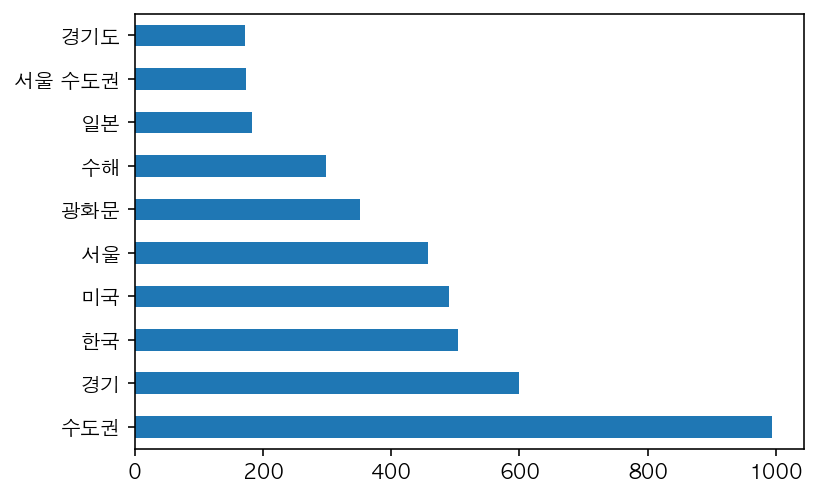

In [28]:
# Pandas는 plot 기능을 내장하고 있습니다.
# 위에서 분석한 지역의 수를 막대 그래프로 표현해 보자.
area.plot.barh()

<AxesSubplot:ylabel='개체명(지역)'>

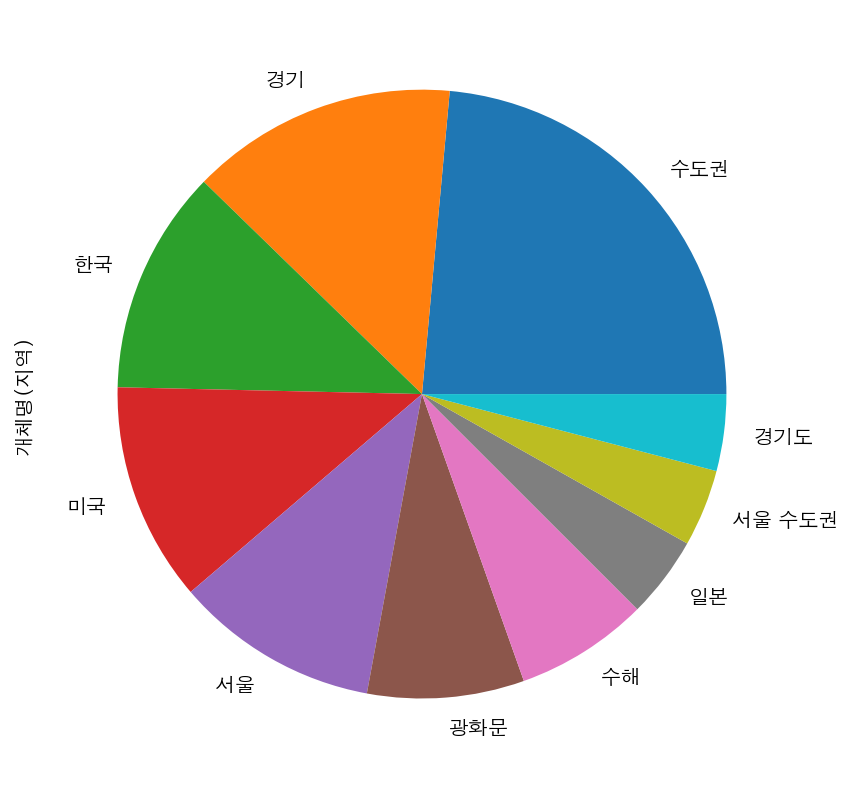

In [29]:
# 판다스의 plot,.pie()를 사용해서 그래프 그려보기
area.plot.pie(figsize=(7,7))

In [30]:
# seaborn 의 countplot으로 그려보기.
sns.countplot(data=tmp, y='언론사')

NameError: name 'tmp' is not defined

In [31]:
# '지역'으로 갯수를 세어보기
c = df['개체명(지역)'].value_counts().head(10)
c

수도권       995
경기        599
한국        504
미국        491
서울        458
광화문       352
수해        299
일본        183
서울 수도권    173
경기도       172
Name: 개체명(지역), dtype: int64

In [32]:
# normalize=True 를 사용해서 비율 구하기.
n = df['개체명(지역)'].value_counts(normalize=True).head(10)
n

수도권       0.010470
경기        0.006303
한국        0.005303
미국        0.005166
서울        0.004819
광화문       0.003704
수해        0.003146
일본        0.001926
서울 수도권    0.001820
경기도       0.001810
Name: 개체명(지역), dtype: float64

<AxesSubplot:>

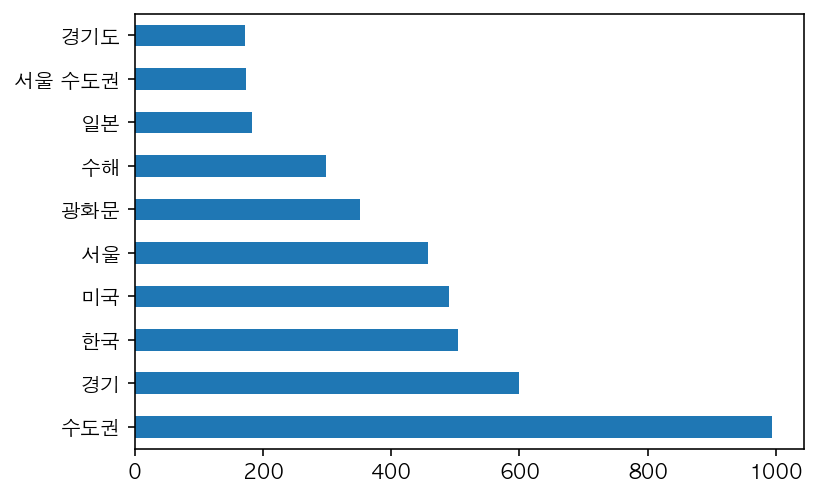

In [33]:
# 판다스의 plot.bar()을 사용해서 막대 그래프 그리기.
c.plot.barh()

## 데이터 색인하기
- 특정 데이터만 가져오기

In [34]:
# '언론사'가 '중앙일보'인 데이터만 가져와서
# df_firm 변수에 담기
# copy()를 해야 원본이 유지된다.

df_firm = df[df['언론사'] == '중앙일보'].copy()
df_firm.head() 

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
17,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,중앙일보,박민제(letmein@joongang.co.kr),"[한국의 실리콘밸리, 판교] “원격수업으로 교육격차 더 심해진다, 사회가 대안 찾아야”",사회>교육_시험,사회>여성,실리콘밸리 탄자니아 미국 볼티모어 아프리카 한국 샌프란시스코,유네스코 정부 화상 한국 샌프란시스코,"원격수업,교육격차,사회,대안,에듀테크,에누마,이수인,대표,온라인,교육,한계,직시,소...","코로나19,온라인,미국,아이들,에누마,공교육,애들,파드,킷킷스쿨,도서관,아프리카,에...",미국 볼티모어에 사는 사라 엘라이는 다음 학기 두 자녀를 가르칠 개인 교사를 물색 ...,https://news.joins.com/article/olink/23433204
88,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,중앙일보,문희철(reporter@joongang.co.kr),"89세에도 구속된 이만희…확진자 38%, 슈퍼전파 책임 가린다",사회>사건_사고,국제>국제일반,수원 안산 후베이성 우한 일평 중국 수원지검 경기 대구교회 가평군 경기도,만국회 검찰 형사6부 질병관리본부 법원 중앙방역대책본부 신천지예수교 애초 신천지 수...,"89세,구속,이만희,확진자,책임,38%,,슈퍼,전파,법원,이만희,신천지,총회장,구속...","코로나19,신천지,이만희,확진자,총회장,신도,일평균,수원지법,중국,56억,50억,대...","━ .. 법원, 이만희 신천지 총회장 구속 .. .. .. .. .. .. 신종 코...",https://news.joins.com/article/olink/23433169
89,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,중앙일보,서유진(suh.youjin@joongang.co.kr),미국판 코로나 차별…동성애자라 '혈장 기증' 거부당한 이들,국제>미국_북미,국제>아시아,캐나다 미국 뉴욕 서한 말레이시아 시나이 한국 서유 호주,미국 식품의약국 FDA 미국 민주당 로이터통신 동성,"차별,미국판,코로나,동성애자,혈장,기증,거부,감염증,신종,코로나바이러스,코로나,미국...","미국,코로나,동성애자,코헨,진행자,소수자,hiv,3개월,완치자,서유진,뉴욕,민주당,...",신종 코로나바이러스 감염증(코로나 19)을 이겨낸 미국 유명 TV 진행자가 혈장을 ...,https://news.joins.com/article/olink/23433174
97,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,중앙일보,이민정(lee.minjung2@joongang.co.kr),인도서 술 대신 손 소독제 마셨다가 10명 사망,사회>사회일반,국제>유럽_EU,인도 아삼주 펀자브주 안드라프라데시주 서벵골주,정부 힌두스탄타임스,"인도,소독제,사망,빈민촌,인도,남동부,소독제,목숨,사례,속출,대용,알코올,성분,함유...","소독제,코로나19,쿠리체두,서벵골주,코로나바이러스,힌두스탄타임스,남동부,판매점,빈곤...",인도 남동부 빈민촌에서 손 소독제를 마시고 목숨을 잃는 사례가 속출하고 있다... ...,https://news.joins.com/article/olink/23433369
105,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,중앙일보,최종권.이은지(choi.jongkwon@joongang.co.kr),부산항 러시아 어선 2명 또 확진…선원 확진자 92명으로 늘어,국제>러시아,지역>경남,부산항 부산시 신선대 영도구 부산 북항 러시아,보건당국 선원 승선원 부산의료원 국립검역소,"부산항,러시아,어선,확진,선원,확진자,판정,음성,의심증상,확진,내국인,n차,감염,가...","러시아,확진자,부산항,부산,내국인,2명,페트르원호,승선원,코로나19,보건당국,코로나...",부산항에 입항한 러시아 선박에서 신종 코로나바이러스 감염증(코로나19)에 걸린 선원...,https://news.joins.com/article/olink/23433374


In [35]:
# '통합 분류1'에서 '정치>정치일반'만 가져오기.
# df.loc을 사용하면 행, 열을 함께 가져올 수 있다.
# 이 기능을 통해 '통합 분류2'만 가져오기.
# 결과를 value_couut
m = df['통합 분류1'] == '정치>정치일반'
df.loc[m, '통합 분류2'].value_counts()

사회>사회일반       20
경제>경제일반       18
경제>취업_창업      13
국제>국제일반       13
사회>노동_복지      12
사회>교육_시험      12
국제>일본         11
국제>미국_북미      10
지역>경남          8
경제>금융_재테크      7
국제>중국          7
지역>광주          6
국제>유럽_EU       6
지역>부산          5
지역>울산          4
경제>무역          4
사회>여성          4
경제>부동산         3
지역>경기          3
문화>문화일반        3
사회>날씨          3
사회>미디어         3
국제>러시아         2
국제>중동_아프리카     2
국제>아시아         2
경제>자동차         2
지역>전북          2
경제>자원          2
사회>의료_건강       2
지역>강원          2
지역>충남          2
IT_과학>모바일      1
IT_과학>과학       1
지역>대구          1
경제>증권_증시       1
국제>중남미         1
지역>충북          1
문화>종교          1
사회>환경          1
문화>학술_문화재      1
문화>전시_공연       1
IT_과학>보안       1
지역>대전          1
경제>반도체         1
Name: 통합 분류2, dtype: int64

In [36]:
# 사회>사회일반만 따로 모아보기.
df_society = df[df['통합 분류2'] == '사회>사회일반'].copy()

In [37]:
df['언론사'].value_counts().head(10)

아시아경제    6452
머니투데이    6035
매일경제     5709
한국경제     5149
YTN      4720
헤럴드경제    4534
서울경제     4478
조선일보     4329
세계일보     3944
국민일보     3370
Name: 언론사, dtype: int64

In [38]:
df_society['언론사'].value_counts().head(10)

아시아경제    129
YTN      121
세계일보     111
머니투데이     92
매일경제      89
한국일보      80
조선일보      71
국민일보      68
서울신문      66
서울경제      63
Name: 언론사, dtype: int64

### 여러 조건으로 색인하기

In [39]:
# '언론사'가 '중앙일보'
# '통합 분류1'이 '정치>정치일반'인 데이터만 가져오기.

df_joongang_politics = df[(df['언론사'] == "중앙일보") & (df['통합 분류1'] == "정치>정치일반")]
print(df_joongang_politics.shape)
df_joongang_politics.head()

(15, 13)


,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
11355,http://www.bigkinds.or.kr/news/newsDetailView....,20200805.0,중앙일보,최은경(choi.eunkyung@joins.com),찬성 안해 4시간도 안돼 반대 아니다···서울시의 우왕좌왕,정치>정치일반,NaN,서울 계산 서울시,정부 기획재정부 서울시청 국토부 국토교통부 서울시 내셔널팀,"찬성,4시간,반대,서울시,우왕좌왕,취재일기,소신,전략,협의,주체,신뢰,공공재건축,서...","서울시,본부장,공공재건축,서울,설명자료,최은경,공공재,서울시청,우왕좌왕,권한대행,국...",“공공재건축은 서울시는 찬성하지 않는 방식이다.” .. .. ..“서울시도 공공재건...,https://news.joins.com/article/olink/23436559
23516,http://www.bigkinds.or.kr/news/newsDetailView....,20200810.0,중앙일보,정은혜(jeong.eunhye1@joongang.co.kr),"美 안보보좌관 中, 트럼프 대선 패배 원해…틱톡은 실질적인 안보 우려",정치>정치일반,국제>미국_북미,미국 이란 위스콘신 중국 펜실베이니아 미 미시간 노스캐롤라이나 플로리다 러시아 오브라이언,국가방첩안보센터(NCSC 미국 정부 민주당 중국 백악관 틱톡 바이트댄스사 펜실베이니...,"안보,보좌관,트럼프,대선,패배,틱톡,실질적,안보,감염증,신종,코로나바이러스,코로나1...","러시아,미국,중국,틱톡,위스콘신,보좌관,오브라이언,코로나19,웹사이트,민주당,펜실베...",신종 코로나바이러스 감염증(코로나19)에 걸렸다가 회복된 로버트 오브라이언 미국 백...,https://news.joins.com/article/olink/23439507
27310,http://www.bigkinds.or.kr/news/newsDetailView....,20200811.0,중앙일보,박현영(park.hyunyoung@joongang.co.kr),"트럼프 G7 회의, 대선 이후 열 것…日 현재 틀 유지해야 확대 반대",정치>정치일반,국제>러시아,플로리다주 캐나다 독일 우크라이나 미국 리조트 한국 워싱턴 크림반도 인도 영국 도랄...,독일 미국 일본 G11 정상회 한국 G8 유엔 총회 외교부 백악관 외무장관 정상회의...,"회의,트럼프,대선,유지,확대,반대,정상,회의,예정,개최,연기,대선,개최,분위기,9월...","g7,한국,러시아,미국,독일,일본,정상들,의장국,강경화,정상회의,회원국",도널드 트럼프 미국 대통령이 주요 7개국(G7) 정상회의를 11월 3일로 예정된 대...,https://news.joins.com/article/olink/23440538
41173,http://www.bigkinds.or.kr/news/newsDetailView....,20200816.0,중앙일보,김도년(kim.donyun@joongang.co.kr),김대지 국세청장 후보자 경제 여건 고려해 신중히 세무조사,정치>정치일반,경제>경제일반,무산,미래통합당 국세청 기획재정부 국세청장 국회 기획재정위원회,"여건,김대지,국세청장,후보자,경제,여건,세무조사,후보자,김대지,국세청장,경제,여건,...","세무조사,후보자,국세청,인사청문회,납세자,김대지,코로나바이러스,청문회,국세청장,기본...",김대지 국세청장 후보자는 ..어려운 경제 여건을 고려해 신중하고 절제된 방식으로 세...,https://news.joins.com/article/olink/23444554
55488,http://www.bigkinds.or.kr/news/newsDetailView....,20200819.0,중앙일보,김은빈(kim.eunbin@joongang.co.kr),차명진 확진통보 받은 후 기자들 동시에 전화···누가 알렸나,정치>정치일반,NaN,광화문 차명진#전 국회의원 경복궁,보건당국 사랑제일교회,"차명진,확진통보,동시,전화,광복절,광화문,집회,참석,신종,코로나바이러스,감염증,코로...","보건소,광화문,감염증,차명진,동화면세점,기자들,경복궁,광복절,사랑제일교회,보건당국,...",광복절 광화문 집회 참석 후 19일 신종 코로나바이러스 감염증(코로나19) 확진 판...,https://news.joins.com/article/olink/23446904


In [40]:
df_joongang_politics_title = df[(df['언론사'] == '중앙일보') & (df['통합 분류1'] == '정치>정치일반')]['제목'].copy()

In [44]:
len(df_joongang_politics_title)
df_joongang_politics_title

11355           찬성 안해 4시간도 안돼 반대 아니다···서울시의 우왕좌왕
23516     美 안보보좌관 中, 트럼프 대선 패배 원해…틱톡은 실질적인 안보 우려
27310     트럼프 G7 회의, 대선 이후 열 것…日 현재 틀 유지해야 확대 반대
41173            김대지 국세청장 후보자 경제 여건 고려해 신중히 세무조사
55488          차명진 확진통보 받은 후 기자들 동시에 전화···누가 알렸나
56623                    [중앙시평] 거위의 털을 아프게 뽑는 정부
66291             진영 사랑제일교회發 확산, 신천지보다 심각…무관용 원칙
71372            추석 이동제한 고민한다던 與, 부랴부랴 검토 안했다 해명
81759                  “코로나19, 락다운은 지속가능 해결책 아냐”
90742     문 대통령, 집회명단 제출 거부한 민주노총 겨냥 “방역엔 특권 없다”
92383      늘어나는 세금, 허리 휘는 국민...작년 국민부담률 첫 27% 돌파
95156            앞뒤 안맞는 부동산 정책, 끝까지 추적해 방향 제시했으면
95850          文 거리두기 2단계 효과 지켜본뒤, 3단계 격상 신중히 검토
96640         사상 최대로 걷은 세금, 국민부담률 6년새 23.1→27.3%
106467         오늘 퇴원 차명진 文정권, 집회=코로나 전파 증거 제시 못해
Name: 제목, dtype: object